In [1]:

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Implementation of Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2, ResNet50V2
import tensorflow as tf
from tensorflow.keras.applications import VGG16

'''Image generation and preprocessing'''


from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/DS.zip

Streaming output truncated to the last 5000 lines.
  inflating: DS/Dolphin/Dolphin_original_5435806747_2de641d05b_o.jpg_f7ac874a-efc7-4bb0-a0af-5c244c86ee2a.jpg  
  inflating: DS/Dolphin/Dolphin_original_5453750787_5771dd5dd0_o.jpg_cf783e03-67d1-48d3-908a-08469caf8f19.jpg  
  inflating: DS/Dolphin/Dolphin_original_5458620780_6f454455d9_o.jpg_90251c05-0afe-4931-bbcf-7187a8f01de0.jpg  
  inflating: DS/Dolphin/Dolphin_original_5458620780_6f454455d9_o.jpg_949f8425-2b55-4537-946b-1a28204ff798.jpg  
  inflating: DS/Dolphin/Dolphin_original_5485640661_f2762bc372_o.jpg_408f5ef2-e592-430b-a4e1-6a8ed50452cf.jpg  
  inflating: DS/Dolphin/Dolphin_original_5485640661_f2762bc372_o.jpg_dfe11883-231c-4506-9b46-0a1835db3087.jpg  
  inflating: DS/Dolphin/Dolphin_original_5485640661_f2762bc372_o.jpg_ef41e98e-2786-4b4a-8538-1ba4d5ec2d63.jpg  
  inflating: DS/Dolphin/Dolphin_original_5504224662_9b0555c70a_b.jpg_0e7ec298-5fe4-44bc-916a-4ca7ca72243a.jpg  
  inflating: DS/Dolphin/Dolphin_original_5504224662_9

In [2]:
DIR = 'C:\Ahmed\Education\AI_Project' #Creating a master directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes out of the required folders
classes



['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster']

In [ ]:

def create_augmentor_pipeline(class_path):
    pipeline = Augmentor.Pipeline(class_path)
    # Add desired augmentations to the pipeline
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    pipeline.zoom_random(probability=0.5, percentage_area=0.8)
    pipeline.flip_left_right(probability=0.5)
    # Add more augmentations as needed
    return pipeline

classes = ["Corals", "Crabs", "Dolphin","Eel","Jelly Fish","Lobster"]  # Add your class names
for class_name in classes:
    if(class_name=="Jelly Fish"):
        class_path = f"{DIR}/{class_name}"
        pipeline = create_augmentor_pipeline(class_path)
        pipeline.sample(660)  # Specify the number of augmented samples you want


Initialised with 845 image(s) found.
Output directory set to /Ahmed/Education/ZEBALAA/archive/Jelly Fish\output.

Processing <PIL.Image.Image image mode=RGB size=200x300 at 0x291A6FF8650>: 100%|██████████| 660/660 [00:02<00:00, 310.24 Samples/s]                  


In [3]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.jpg':               # If filename contains .jpg
            label.append(os.path.split(dirname)[-1])         # Append the directory name to label
            path.append(os.path.join(dirname,filename))     # Append all the jpg files to path of that directory

# Ready to create the df
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

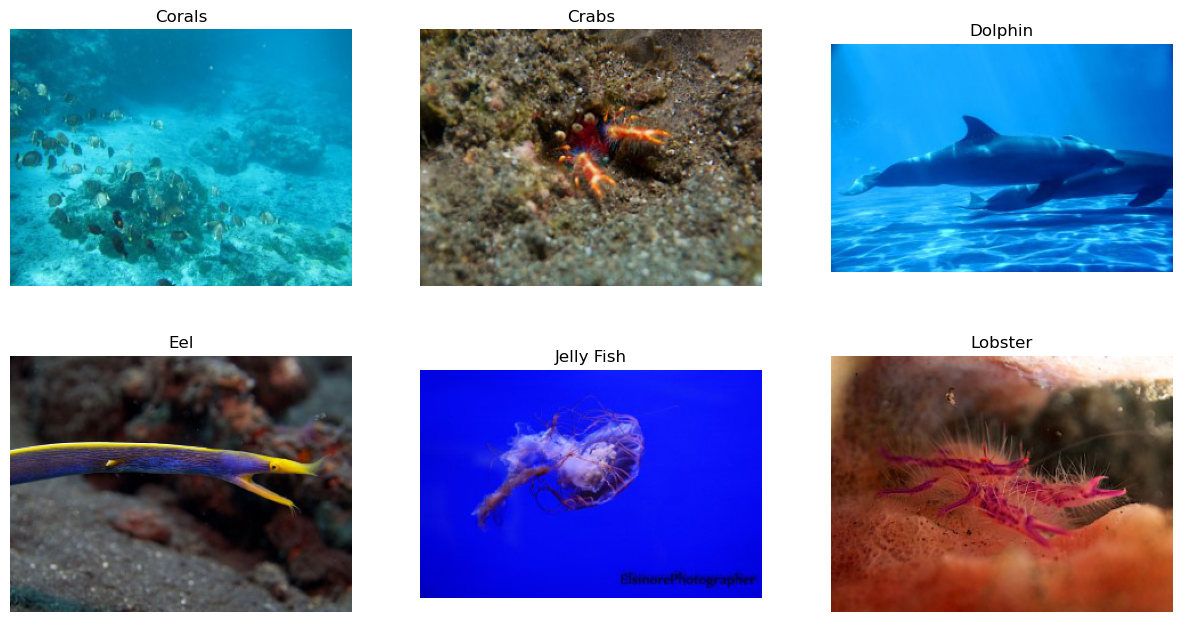

In [4]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [10]:
df.head()



,path,label
0,/content/DS/Jelly Fish/Jelly Fish_original_Jel...,Jelly Fish
1,/content/DS/Jelly Fish/Jelly Fish_original_419...,Jelly Fish
2,/content/DS/Jelly Fish/Jelly Fish_original_156...,Jelly Fish
3,/content/DS/Jelly Fish/Jelly Fish_original_232...,Jelly Fish
4,/content/DS/Jelly Fish/41074419922_eee7667990_...,Jelly Fish


In [11]:
df['label'].value_counts()

Jelly Fish    1497
Corals        1496
Lobster       1496
Crabs         1492
Eel           1492
Dolphin       1490
Name: label, dtype: int64

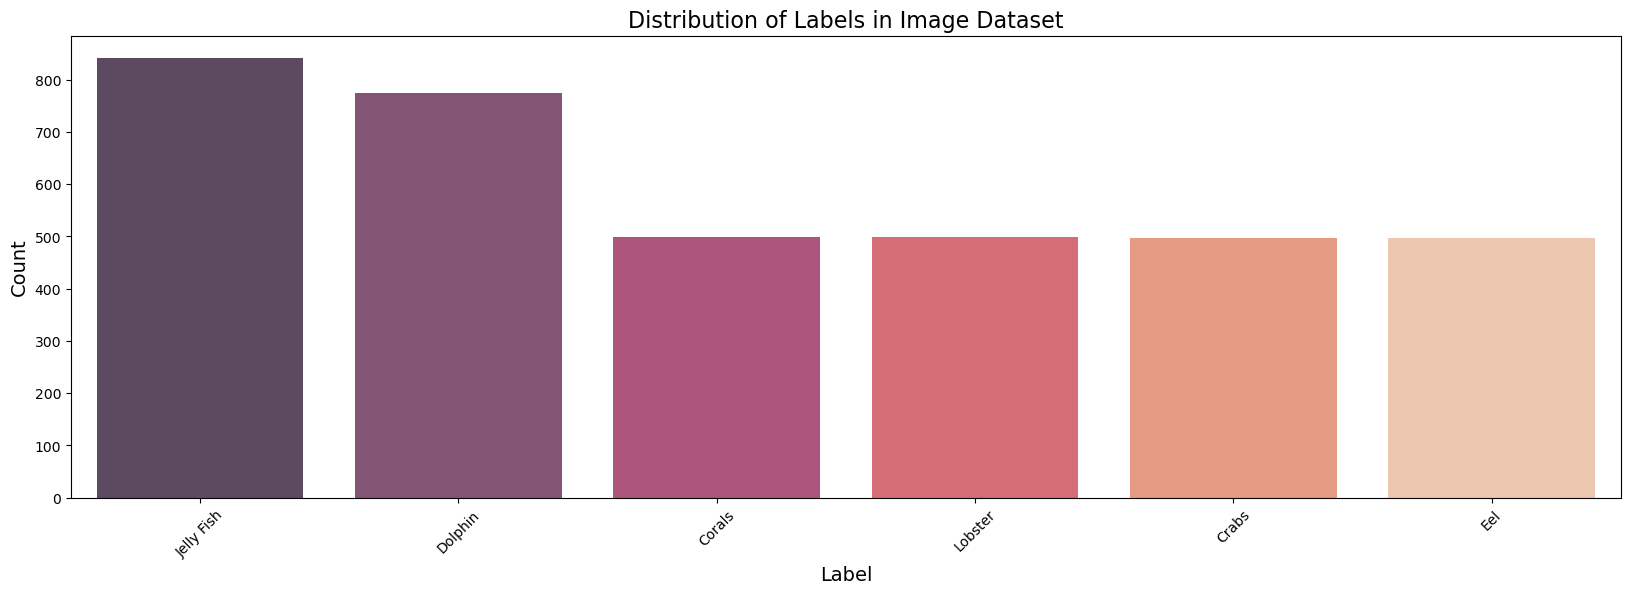

In [ ]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')
plt.title('Distribution of Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

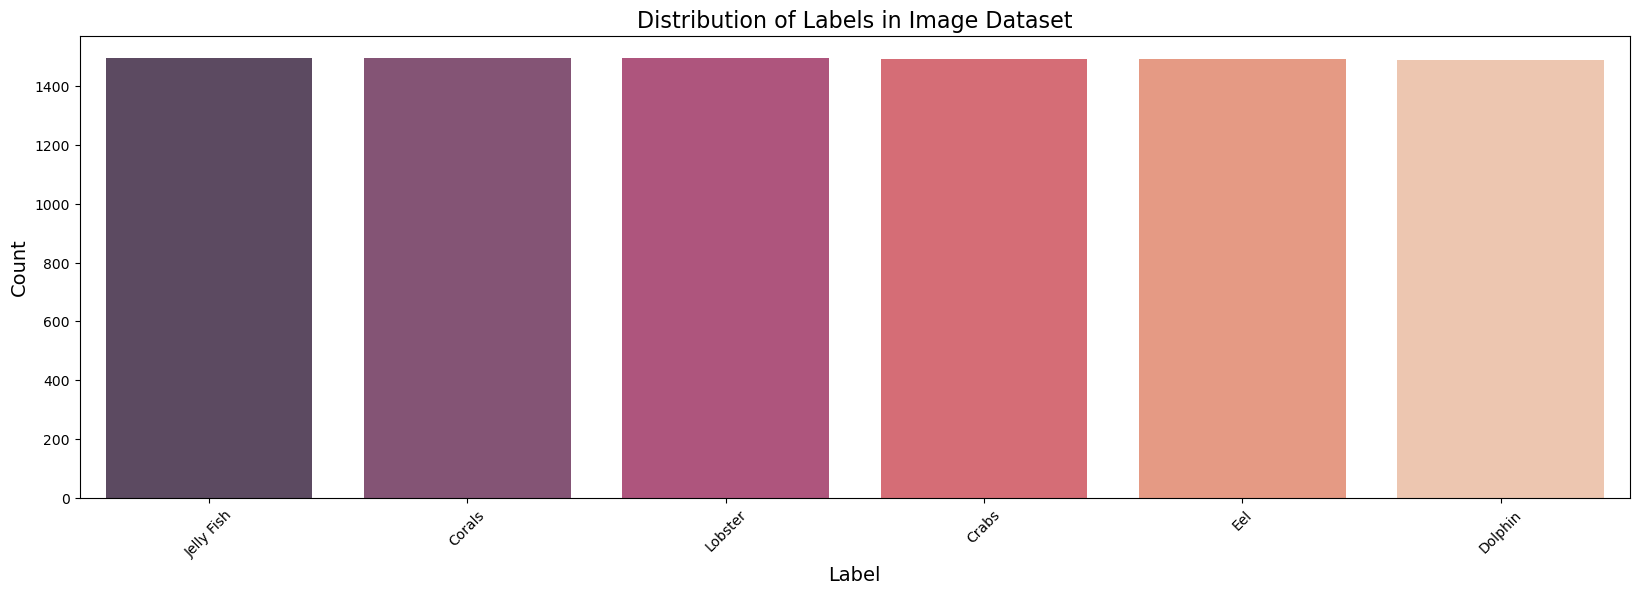

In [ ]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')
plt.title('Distribution of Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [12]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42, stratify=df['label'])

In [13]:
print(train_df.shape)
print(test_df.shape)

(7170, 2)
(1793, 2)


In [14]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_images1 = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size= (224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images1 = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size= (224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images1 = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size= (224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5736 validated image filenames belonging to 6 classes.
Found 1434 validated image filenames belonging to 6 classes.
Found 1793 validated image filenames belonging to 6 classes.


In [16]:
display(train_images1.class_indices)
display(val_images1.class_indices)
display(test_images1.class_indices)


{'Corals': 0,
 'Crabs': 1,
 'Dolphin': 2,
 'Eel': 3,
 'Jelly Fish': 4,
 'Lobster': 5}

{'Corals': 0,
 'Crabs': 1,
 'Dolphin': 2,
 'Eel': 3,
 'Jelly Fish': 4,
 'Lobster': 5}

{'Corals': 0,
 'Crabs': 1,
 'Dolphin': 2,
 'Eel': 3,
 'Jelly Fish': 4,
 'Lobster': 5}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


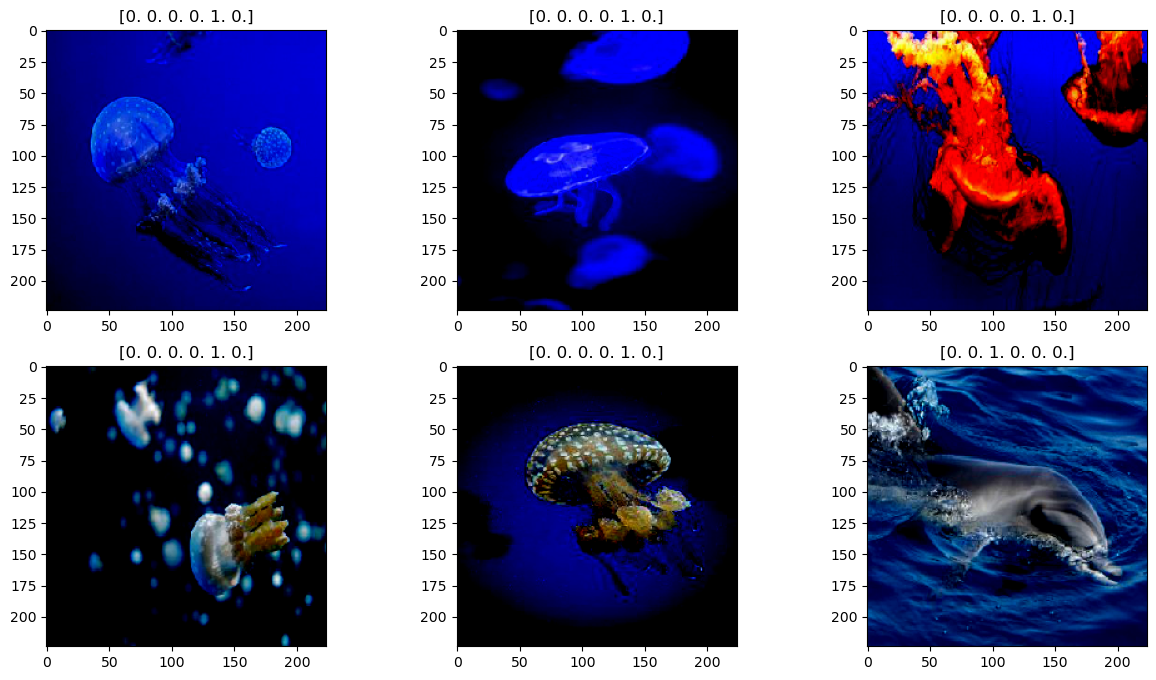

In [ ]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_images1.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

In [44]:
pretrained_model1 = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze the weights of the MobileNetV2 layers
pretrained_model1.trainable = False

In [45]:
inputs = pretrained_model1.input

# Add custom dense layers on top of the MobileNetV2 output
x = tf.keras.layers.Flatten()(pretrained_model1.output)  # Flatten the output of MobileNetV2
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)




# Add the final dense layer with 23 units (assuming it's a classification task with 23 classes) and softmax activation
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

# Create a new model using the input layer of MobileNetV2 and the custom output layers
model1 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [46]:
model1.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_12[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']     

In [47]:
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [48]:
history1 = model1.fit(train_images1,
                    validation_data=val_images1,
                    epochs=10,
                    callbacks=[early_stopping]
                    )

Epoch 1/10
180/180 [==============================] - 24s 113ms/step - loss: 0.3142 - accuracy: 0.8963 - val_loss: 0.1729 - val_accuracy: 0.9393
Epoch 2/10
180/180 [==============================] - 17s 93ms/step - loss: 0.1258 - accuracy: 0.9554 - val_loss: 0.1561 - val_accuracy: 0.9498
Epoch 3/10
180/180 [==============================] - 18s 99ms/step - loss: 0.0798 - accuracy: 0.9735 - val_loss: 0.2346 - val_accuracy: 0.9226
Epoch 4/10
180/180 [==============================] - 18s 101ms/step - loss: 0.0609 - accuracy: 0.9782 - val_loss: 0.1372 - val_accuracy: 0.9554
Epoch 5/10
180/180 [==============================] - 18s 98ms/step - loss: 0.0322 - accuracy: 0.9890 - val_loss: 0.1432 - val_accuracy: 0.9616
Epoch 6/10
180/180 [==============================] - 16s 90ms/step - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.2169 - val_accuracy: 0.9498
Epoch 7/10
180/180 [==============================] - 17s 94ms/step - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.1441 - val_accurac

In [49]:
results1 = model1.evaluate(test_images1, verbose=0)
print("Test Loss: {:.5f}".format(results1[0]))
print("Test Accuracy: {:.2f}%".format(results1[1] * 100))



Test Loss: 0.12212
Test Accuracy: 96.26%


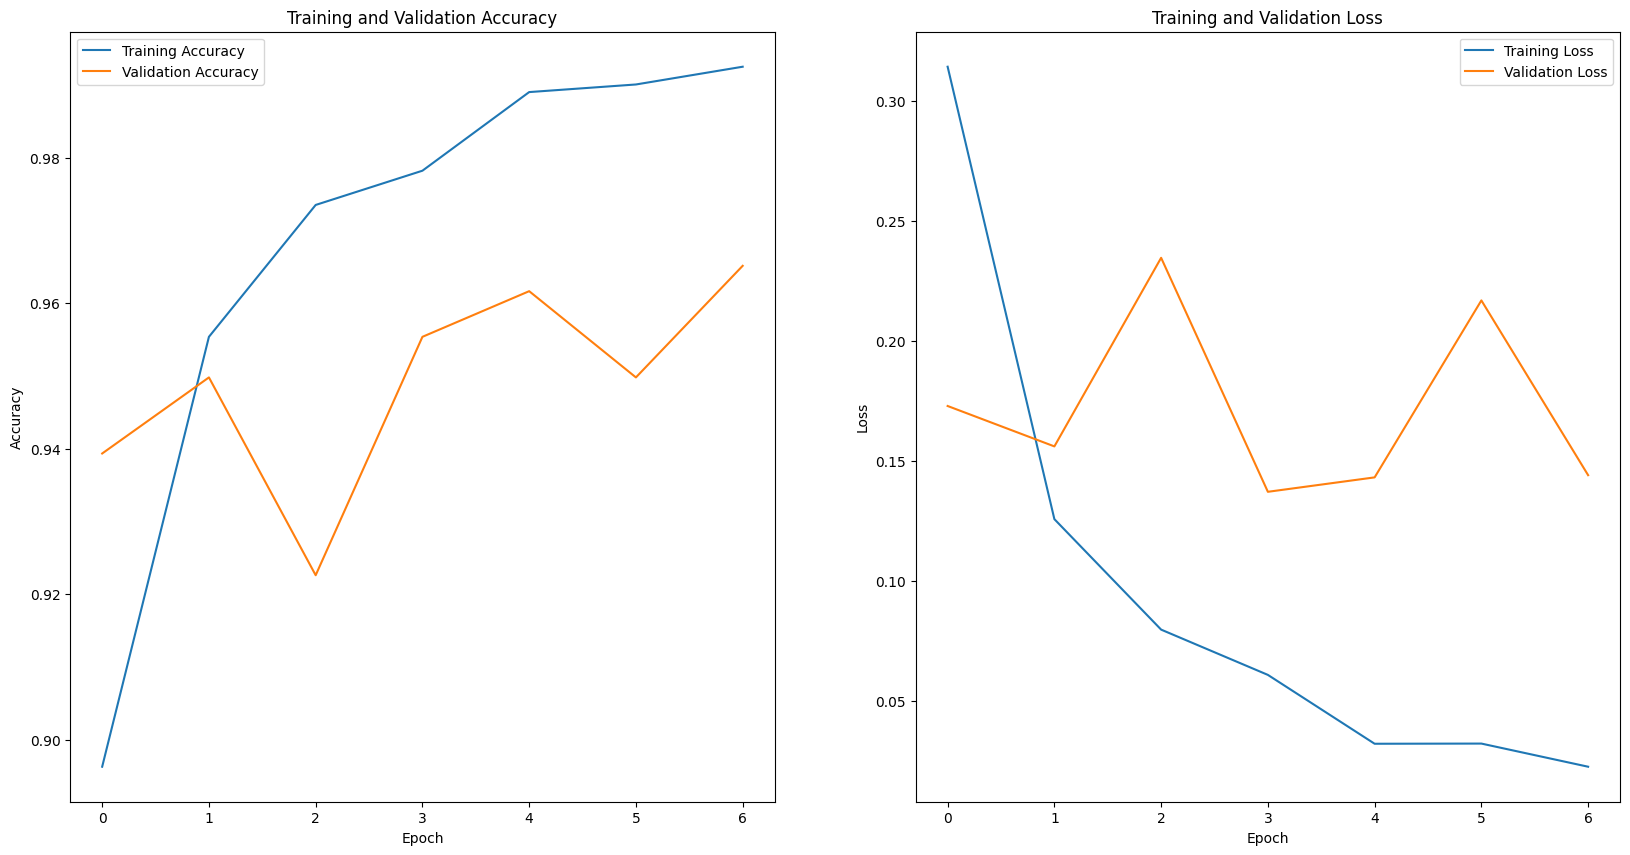

In [50]:
plt.figure(figsize=(20, 10))
# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
model1.save('MN.h5')

In [52]:
model1.load_weights('MN.h5')

In [53]:
pred1 = model1.predict(test_images1)
pred1=np.argmax(pred1,axis=1)



57/57 [==============================] - 5s 68ms/step


In [54]:
y_true1=test_images1.classes

In [55]:
print(classification_report(y_true1, pred1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       299
           1       0.98      0.99      0.99       298
           2       0.98      1.00      0.99       298
           3       0.95      0.92      0.93       299
           4       1.00      0.97      0.98       300
           5       0.94      0.94      0.94       299

    accuracy                           0.96      1793
   macro avg       0.96      0.96      0.96      1793
weighted avg       0.96      0.96      0.96      1793



In [56]:
pred_df1=test_df.copy()
labels={}
for l,v in test_images1.class_indices.items(): 
    labels.update({v:l}) # updates the labels dictionary by adding an entry where the class index (v) is the key, and the corresponding class label (l) is the value. 
pred_df1['pred']=pred1 # Adds new prediction column
pred_df1['pred']=pred_df1['pred'].apply(lambda x: labels[x]) # Replaces class indices with label



In [57]:
# Visualize the pred_df
pred_df1=pred_df1.reset_index(drop=True)
pred_df1.head(10)



,path,label,pred
0,/content/DS/Eel/Eel_original_14280696540_d8bbb...,Eel,Eel
1,/content/DS/Jelly Fish/JellyFish (290).jpg,Jelly Fish,Jelly Fish
2,/content/DS/Eel/Eel_original_14280739098_166c1...,Eel,Eel
3,/content/DS/Corals/Corals_original_5476531005_...,Corals,Corals
4,/content/DS/Crabs/15933156699_785b86be8b_o.jpg,Crabs,Crabs
5,/content/DS/Jelly Fish/43745338970_dd96e5720d_...,Jelly Fish,Jelly Fish
6,/content/DS/Eel/11560314403_c623953e68_o.jpg,Eel,Eel
7,/content/DS/Crabs/22043335118_5b3a2b2e9e_b.jpg,Crabs,Crabs
8,/content/DS/Jelly Fish/14331959343_45b748f229_...,Jelly Fish,Jelly Fish
9,/content/DS/Lobster/Lobster_original_477223970...,Lobster,Lobster


Text(0.5, 1.0, 'Confusion Matrix')

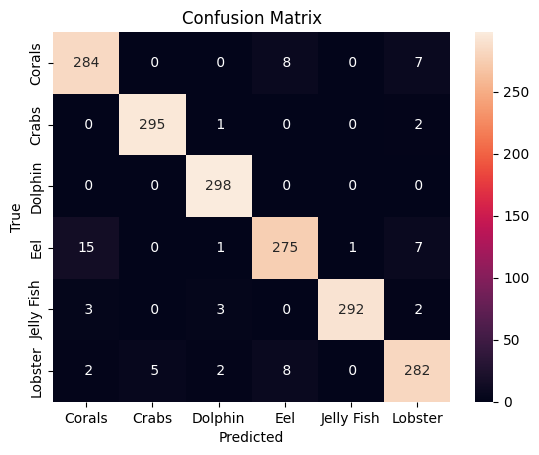

In [58]:
labels= ['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster']
sns.heatmap(confusion_matrix(pred_df1['label'],pred_df1['pred']), xticklabels=labels, yticklabels= labels,annot=True, fmt='2d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [59]:
# Incorrect prediction
pred_df1[pred_df1['label']!=pred_df1['pred']]




,path,label,pred
19,/content/DS/Lobster/7902428586_48df11ecbe_o.jpg,Lobster,Eel
22,/content/DS/Lobster/Lobster_original_670194531...,Lobster,Crabs
42,/content/DS/Lobster/Lobster_original_151955744...,Lobster,Crabs
45,/content/DS/Corals/Corals_original_13981616238...,Corals,Lobster
71,/content/DS/Crabs/Crabs_original_6242392211_8a...,Crabs,Dolphin
...,...,...,...
1653,/content/DS/Eel/Eel_original_8494400_6b9dde85e...,Eel,Corals
1751,/content/DS/Eel/37745212636_b022d41769_o.jpg,Eel,Corals
1760,/content/DS/Lobster/Lobster_original_789878050...,Lobster,Eel
1774,/content/DS/Eel/Eel_original_7692494802_0089a2...,Eel,Lobster


In [102]:
# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this number based on your preference

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a list to store the performance metrics for each fold
fold_metrics = []

# Loop through each fold
for fold_index, (train_index, val_index) in enumerate(stratified_kfold.split(train_df['path'], train_df['label'])):
    # Split the data into training and validation sets for this fold
    train_fold_df = train_df.iloc[train_index]
    val_fold_df = train_df.iloc[val_index]

    # Data generators for this fold
    train_generator_fold = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
        dataframe=train_fold_df,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=42
    )

    val_generator_fold = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
        dataframe=val_fold_df,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    # Build and compile the model
    pretrained_model_fold = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )

    pretrained_model_fold.trainable = False

    inputs_fold = pretrained_model_fold.input
    x_fold = tf.keras.layers.Flatten()(pretrained_model_fold.output)
    x_fold = tf.keras.layers.Dense(128, activation='relu')(x_fold)
    x_fold = tf.keras.layers.Dense(128, activation='relu')(x_fold)
    outputs_fold = tf.keras.layers.Dense(6, activation='softmax')(x_fold)

    model_fold = tf.keras.Model(inputs=inputs_fold, outputs=outputs_fold)
    model_fold.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model for this fold
    history_fold = model_fold.fit(
        train_generator_fold,
        validation_data=val_generator_fold,
        epochs=10,
        callbacks=[early_stopping],
        verbose=1
    )
        # Print the epoch during training
    print(f"Fold {fold_index + 1} - Epoch {len(history_fold.history['loss'])}/{10}: "
        f"Train Loss: {history_fold.history['loss'][-1]}, "
        f"Validation Loss: {history_fold.history['val_loss'][-1]}")

    # Evaluate the model on the test set for this fold
    results_fold = model_fold.evaluate(test_images1, verbose=0)
    fold_metrics.append({
        'fold_index': fold_index,
        'train_loss': history_fold.history['loss'][-1],
        'val_loss': history_fold.history['val_loss'][-1],
        'train_accuracy': history_fold.history['accuracy'][-1],
        'val_accuracy': history_fold.history['val_accuracy'][-1],
        'test_loss': results_fold[0],
        'test_accuracy': results_fold[1]
    })



Found 5736 validated image filenames belonging to 6 classes.
Found 1434 validated image filenames belonging to 6 classes.
Epoch 1/10
180/180 [==============================] - 22s 101ms/step - loss: 0.3090 - accuracy: 0.9003 - val_loss: 0.1585 - val_accuracy: 0.9407
Epoch 2/10
180/180 [==============================] - 17s 96ms/step - loss: 0.1217 - accuracy: 0.9587 - val_loss: 0.1324 - val_accuracy: 0.9533
Epoch 3/10
180/180 [==============================] - 17s 96ms/step - loss: 0.0700 - accuracy: 0.9759 - val_loss: 0.1372 - val_accuracy: 0.9512
Epoch 4/10
180/180 [==============================] - 19s 105ms/step - loss: 0.0551 - accuracy: 0.9801 - val_loss: 0.1096 - val_accuracy: 0.9644
Epoch 5/10
180/180 [==============================] - 17s 95ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.1131 - val_accuracy: 0.9623
Epoch 6/10
180/180 [==============================] - 17s 97ms/step - loss: 0.0150 - accuracy: 0.9970 - val_loss: 0.1121 - val_accuracy: 0.9637
Epoch 7/10
1

In [103]:
# Print average performance metrics across folds
average_metrics = {
    'avg_train_loss': sum([fold['train_loss'] for fold in fold_metrics]) / n_splits,
    'avg_val_loss': sum([fold['val_loss'] for fold in fold_metrics]) / n_splits,
    'avg_train_accuracy': (sum([fold['train_accuracy'] for fold in fold_metrics]) / n_splits)*100,
    'avg_val_accuracy': (sum([fold['val_accuracy'] for fold in fold_metrics]) / n_splits)*100,
    'avg_test_loss': sum([fold['test_loss'] for fold in fold_metrics]) / n_splits,
    'avg_test_accuracy': (sum([fold['test_accuracy'] for fold in fold_metrics]) / n_splits)*100
}

print("Average Performance Metrics Across Folds:")
print(average_metrics)

Average Performance Metrics Across Folds:
{'avg_train_loss': 0.011825252883136272, 'avg_val_loss': 0.14505414217710494, 'avg_train_accuracy': 99.63737845420837, 'avg_val_accuracy': 95.94142317771912, 'avg_test_loss': 0.13734112679958344, 'avg_test_accuracy': 95.8282208442688}


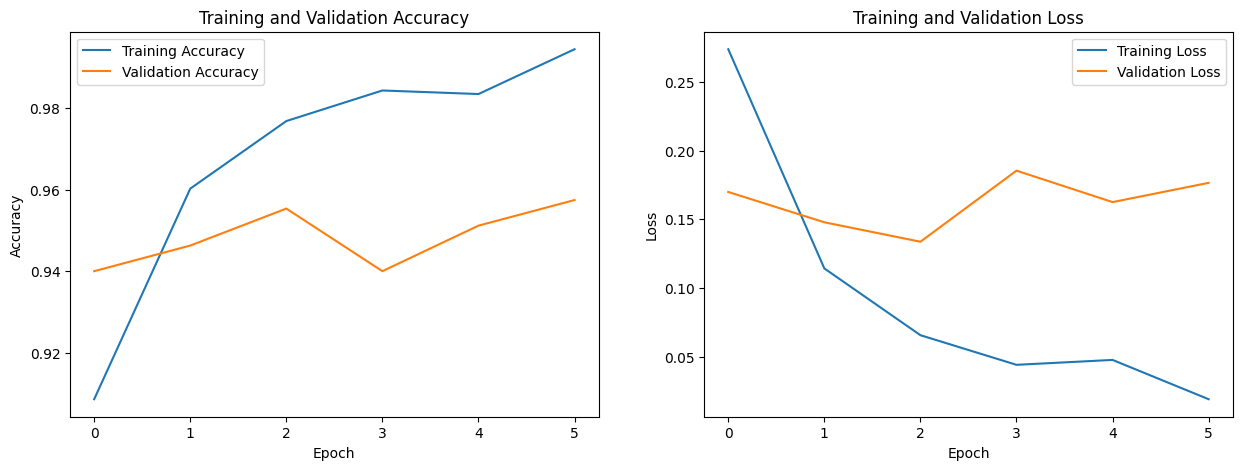

In [20]:
plt.figure(figsize=(15, 5))
# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_fold.history['accuracy'], label='Training Accuracy')
plt.plot(history_fold.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_fold.history['loss'], label='Training Loss')
plt.plot(history_fold.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
results11 = model_fold.evaluate(test_images1, verbose=0)
print("Test Loss: {:.5f}".format(results11[0]))
print("Test Accuracy: {:.2f}%".format(results11[1] * 100))

Test Loss: 0.11791
Test Accuracy: 96.71%


In [94]:
model_fold.save('MN_CV.h5')

In [95]:
model_fold.load_weights('MN_CV.h5')

In [96]:
pred11 = model_fold.predict(test_images1)
pred11=np.argmax(pred11,axis=1)


57/57 [==============================] - 5s 72ms/step


In [97]:
print("Classification Report:")
print(classification_report(y_true1, pred11))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       299
           1       0.99      0.99      0.99       298
           2       0.99      0.99      0.99       298
           3       0.90      0.94      0.92       299
           4       0.98      1.00      0.99       300
           5       0.97      0.89      0.93       299

    accuracy                           0.96      1793
   macro avg       0.96      0.96      0.96      1793
weighted avg       0.96      0.96      0.96      1793



In [98]:
pred_df11=test_df.copy()
labels={}
for l,v in test_images1.class_indices.items():
    labels.update({v:l}) # updates the labels dictionary by adding an entry where the class index (v) is the key, and the corresponding class label (l) is the value. 
pred_df11['pred']=pred11 # Adds new prediction column
pred_df11['pred']=pred_df11['pred'].apply(lambda x: labels[x]) # Replaces class indices with label



In [99]:
# Visualize the pred_df
pred_df11=pred_df11.reset_index(drop=True)
pred_df11.head(10)



,path,label,pred
0,/content/DS/Eel/Eel_original_14280696540_d8bbb...,Eel,Eel
1,/content/DS/Jelly Fish/JellyFish (290).jpg,Jelly Fish,Jelly Fish
2,/content/DS/Eel/Eel_original_14280739098_166c1...,Eel,Eel
3,/content/DS/Corals/Corals_original_5476531005_...,Corals,Corals
4,/content/DS/Crabs/15933156699_785b86be8b_o.jpg,Crabs,Crabs
5,/content/DS/Jelly Fish/43745338970_dd96e5720d_...,Jelly Fish,Jelly Fish
6,/content/DS/Eel/11560314403_c623953e68_o.jpg,Eel,Eel
7,/content/DS/Crabs/22043335118_5b3a2b2e9e_b.jpg,Crabs,Crabs
8,/content/DS/Jelly Fish/14331959343_45b748f229_...,Jelly Fish,Jelly Fish
9,/content/DS/Lobster/Lobster_original_477223970...,Lobster,Lobster


Text(0.5, 1.0, 'Confusion Matrix')

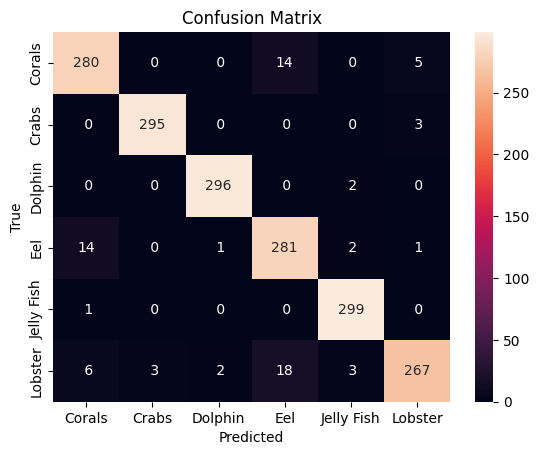

In [100]:
labels= ['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster']
sns.heatmap(confusion_matrix(pred_df11['label'],pred_df11['pred']), xticklabels=labels, yticklabels= labels,annot=True, fmt='2d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [101]:
# Incorrect prediction
pred_df11[pred_df11['label']!=pred_df11['pred']]




,path,label,pred
19,/content/DS/Lobster/7902428586_48df11ecbe_o.jpg,Lobster,Eel
22,/content/DS/Lobster/Lobster_original_670194531...,Lobster,Crabs
42,/content/DS/Lobster/Lobster_original_151955744...,Lobster,Crabs
45,/content/DS/Corals/Corals_original_13981616238...,Corals,Lobster
84,/content/DS/Crabs/Crabs_original_26916715593_c...,Crabs,Lobster
...,...,...,...
1751,/content/DS/Eel/37745212636_b022d41769_o.jpg,Eel,Corals
1760,/content/DS/Lobster/Lobster_original_789878050...,Lobster,Eel
1772,/content/DS/Lobster/5577380526_1ea34e10e2_o.jpg,Lobster,Eel
1774,/content/DS/Eel/Eel_original_7692494802_0089a2...,Eel,Lobster


In [24]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [25]:
train_images2 = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size= (224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images2 = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size= (224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images2 = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size= (224,224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5736 validated image filenames belonging to 6 classes.
Found 1434 validated image filenames belonging to 6 classes.
Found 1793 validated image filenames belonging to 6 classes.


In [26]:
display(train_images2.class_indices)
display(val_images2.class_indices)
display(test_images2.class_indices)


{'Corals': 0,
 'Crabs': 1,
 'Dolphin': 2,
 'Eel': 3,
 'Jelly Fish': 4,
 'Lobster': 5}

{'Corals': 0,
 'Crabs': 1,
 'Dolphin': 2,
 'Eel': 3,
 'Jelly Fish': 4,
 'Lobster': 5}

{'Corals': 0,
 'Crabs': 1,
 'Dolphin': 2,
 'Eel': 3,
 'Jelly Fish': 4,
 'Lobster': 5}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


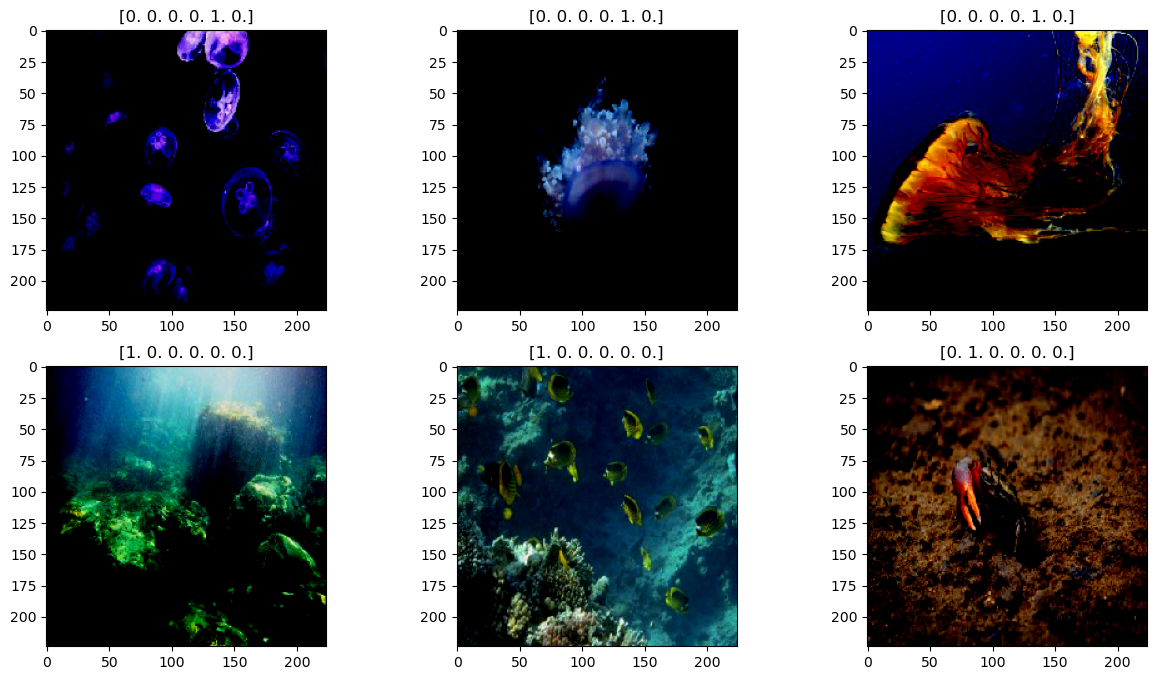

In [ ]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_images2.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1

In [88]:
pretrained_model2 = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze the weights of the ResNet50v2 layers
pretrained_model2.trainable = False

In [89]:
inputs = pretrained_model2.input

# Add custom dense layers on top of the ResNet50V2 output
x = tf.keras.layers.Flatten()(pretrained_model2.output)  # Flatten the output of ResNet50V2
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Add the final dense layer with 6 units and softmax activation
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

# Create a new model using the input layer of ResNet50V2 and the custom output layers
model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [90]:
model2.summary()

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_26 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_26[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                           

In [91]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [92]:
history2 = model2.fit(train_images2,
                    validation_data=val_images2,
                    epochs=10,
                    callbacks=[early_stopping]
                    )

Epoch 1/10
180/180 [==============================] - 28s 122ms/step - loss: 0.2922 - accuracy: 0.9038 - val_loss: 0.1686 - val_accuracy: 0.9400
Epoch 2/10
180/180 [==============================] - 21s 118ms/step - loss: 0.1074 - accuracy: 0.9630 - val_loss: 0.1424 - val_accuracy: 0.9526
Epoch 3/10
180/180 [==============================] - 22s 119ms/step - loss: 0.0702 - accuracy: 0.9759 - val_loss: 0.1245 - val_accuracy: 0.9547
Epoch 4/10
180/180 [==============================] - 21s 115ms/step - loss: 0.0366 - accuracy: 0.9869 - val_loss: 0.1203 - val_accuracy: 0.9623
Epoch 5/10
180/180 [==============================] - 22s 122ms/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.1348 - val_accuracy: 0.9603
Epoch 6/10
180/180 [==============================] - 21s 119ms/step - loss: 0.0245 - accuracy: 0.9927 - val_loss: 0.1185 - val_accuracy: 0.9651
Epoch 7/10
180/180 [==============================] - 22s 123ms/step - loss: 0.0171 - accuracy: 0.9939 - val_loss: 0.2932 - val_ac

In [93]:
results2 = model2.evaluate(test_images2, verbose=0)
print("Test Loss: {:.5f}".format(results2[0]))
print("Test Accuracy: {:.2f}%".format(results2[1] * 100))

Test Loss: 0.16717
Test Accuracy: 95.87%


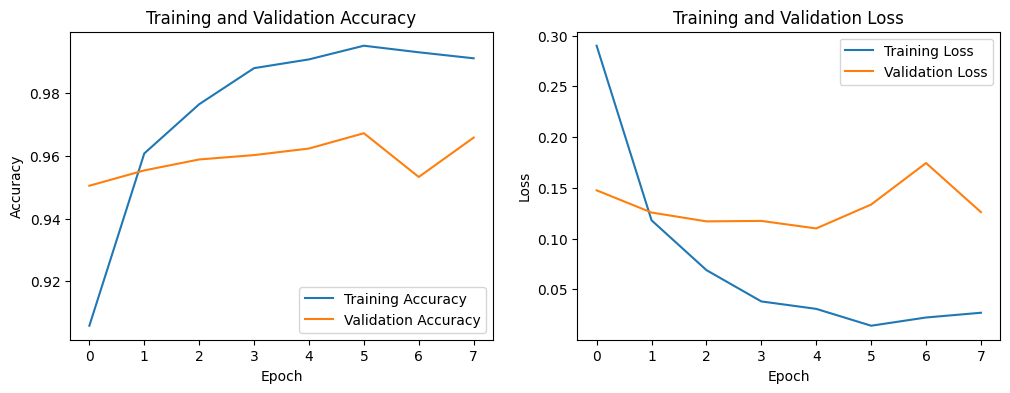

In [33]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
model2.save('RN.h5')

In [35]:
model2.load_weights('RN.h5')

In [36]:
pred2 = model2.predict(test_images2)
pred2=np.argmax(pred2,axis=1)

57/57 [==============================] - 6s 86ms/step


In [37]:
y_true2=test_images2.classes

In [38]:
print("Classification Report:")
print(classification_report(y_true2, pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       299
           1       0.99      0.99      0.99       298
           2       0.99      0.99      0.99       298
           3       0.94      0.92      0.93       299
           4       0.99      0.99      0.99       300
           5       0.95      0.92      0.94       299

    accuracy                           0.96      1793
   macro avg       0.96      0.96      0.96      1793
weighted avg       0.96      0.96      0.96      1793



In [39]:
pred_df2=test_df.copy()
labels={}
for l,v in test_images2.class_indices.items(): 
    labels.update({v:l}) # updates the labels dictionary by adding an entry where the class index (v) is the key, and the corresponding class label (l) is the value. 
pred_df2['pred']=pred2 # Adds new prediction column 
pred_df2['pred']=pred_df2['pred'].apply(lambda x: labels[x]) # Replaces class indices with label

In [40]:
pred_df2=pred_df2.reset_index(drop=True)
pred_df2.head(10)

,path,label,pred
0,/content/DS/Eel/Eel_original_14280696540_d8bbb...,Eel,Eel
1,/content/DS/Jelly Fish/JellyFish (290).jpg,Jelly Fish,Jelly Fish
2,/content/DS/Eel/Eel_original_14280739098_166c1...,Eel,Eel
3,/content/DS/Corals/Corals_original_5476531005_...,Corals,Corals
4,/content/DS/Crabs/15933156699_785b86be8b_o.jpg,Crabs,Crabs
5,/content/DS/Jelly Fish/43745338970_dd96e5720d_...,Jelly Fish,Jelly Fish
6,/content/DS/Eel/11560314403_c623953e68_o.jpg,Eel,Eel
7,/content/DS/Crabs/22043335118_5b3a2b2e9e_b.jpg,Crabs,Crabs
8,/content/DS/Jelly Fish/14331959343_45b748f229_...,Jelly Fish,Jelly Fish
9,/content/DS/Lobster/Lobster_original_477223970...,Lobster,Lobster


Text(0.5, 1.0, 'Confusion Matrix')

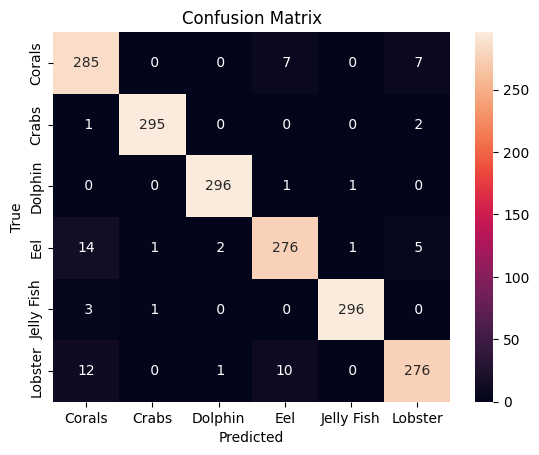

In [41]:
labels= ['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster']
sns.heatmap(confusion_matrix(pred_df2['label'],pred_df2['pred']), xticklabels=labels, yticklabels= labels,annot=True, fmt='2d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [42]:
# Incorrect prediction
pred_df2[pred_df2['label']!=pred_df2['pred']]

,path,label,pred
19,/content/DS/Lobster/7902428586_48df11ecbe_o.jpg,Lobster,Eel
39,/content/DS/Lobster/Lobster_original_790260585...,Lobster,Eel
59,/content/DS/Lobster/Lobster_original_146219574...,Lobster,Corals
114,/content/DS/Eel/31881686523_8f498d85f4_o.jpg,Eel,Corals
116,/content/DS/Corals/Corals_original_20643727620...,Corals,Eel
...,...,...,...
1760,/content/DS/Lobster/Lobster_original_789878050...,Lobster,Eel
1774,/content/DS/Eel/Eel_original_7692494802_0089a2...,Eel,Corals
1783,/content/DS/Lobster/471986197_b96aa46c85_o.jpg,Lobster,Corals
1789,/content/DS/Eel/8494400_6b9dde85e2_o.jpg,Eel,Corals


In [64]:
# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this number based on your preference

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a list to store the performance metrics for each fold
fold_metrics2 = []

# Loop through each fold
for fold_index, (train_index, val_index) in enumerate(stratified_kfold.split(train_df['path'], train_df['label'])):
    # Split the data into training and validation sets for this fold
    train_fold_df = train_df.iloc[train_index]
    val_fold_df = train_df.iloc[val_index]

    # Data generators for this fold
    train_generator_fold = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
        dataframe=train_fold_df,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=42
    )

    val_generator_fold = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
        dataframe=val_fold_df,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    # Build and compile the model
    pretrained_model_fold2 = ResNet50V2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )

    pretrained_model_fold2.trainable = False

    inputs_fold = pretrained_model_fold2.input
    x_fold = tf.keras.layers.Flatten()(pretrained_model_fold2.output)
    x_fold = tf.keras.layers.Dense(128, activation='relu')(x_fold)
    x_fold = tf.keras.layers.Dense(128, activation='relu')(x_fold)
    outputs_fold = tf.keras.layers.Dense(6, activation='softmax')(x_fold)

    model_fold2 = tf.keras.Model(inputs=inputs_fold, outputs=outputs_fold)
    model_fold2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model for this fold
    history_fold2 = model_fold2.fit(
        train_generator_fold,
        validation_data=val_generator_fold,
        epochs=10,
        callbacks=[early_stopping],
        verbose=1
    )
    # Print the epoch during training
    print(f"Fold {fold_index + 1} - Epoch {len(history_fold2.history['loss'])}/{10}: "
        f"Train Loss: {history_fold2.history['loss'][-1]}, "
        f"Validation Loss: {history_fold2.history['val_loss'][-1]}")

    # Evaluate the model on the test set for this fold
    results_fold2 = model_fold2.evaluate(test_images2, verbose=0)
    fold_metrics2.append({
        'fold_index': fold_index,
        'train_loss': history_fold2.history['loss'][-1],
        'val_loss': history_fold2.history['val_loss'][-1],
        'train_accuracy': history_fold2.history['accuracy'][-1],
        'val_accuracy': history_fold2.history['val_accuracy'][-1],
        'test_loss': results_fold2[0],
        'test_accuracy': results_fold2[1]
    })



Found 5736 validated image filenames belonging to 6 classes.
Found 1434 validated image filenames belonging to 6 classes.
Epoch 1/10
180/180 [==============================] - 26s 125ms/step - loss: 0.2519 - accuracy: 0.9189 - val_loss: 0.1550 - val_accuracy: 0.9407
Epoch 2/10
180/180 [==============================] - 22s 119ms/step - loss: 0.0907 - accuracy: 0.9672 - val_loss: 0.1185 - val_accuracy: 0.9533
Epoch 3/10
180/180 [==============================] - 21s 115ms/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.1016 - val_accuracy: 0.9637
Epoch 4/10
180/180 [==============================] - 21s 115ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0872 - val_accuracy: 0.9721
Epoch 5/10
180/180 [==============================] - 21s 114ms/step - loss: 0.0113 - accuracy: 0.9970 - val_loss: 0.0871 - val_accuracy: 0.9756
Epoch 6/10
180/180 [==============================] - 21s 116ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.1105 - val_accuracy: 0.9721
Epoch 7/

In [65]:
# Print average performance metrics across folds
average_metrics2 = {
    'avg_train_loss': sum([fold['train_loss'] for fold in fold_metrics2]) / n_splits,
    'avg_val_loss': sum([fold['val_loss'] for fold in fold_metrics2]) / n_splits,
    'avg_train_accuracy': (sum([fold['train_accuracy'] for fold in fold_metrics2]) / n_splits)*100,
    'avg_val_accuracy': (sum([fold['val_accuracy'] for fold in fold_metrics2]) / n_splits)*100,
    'avg_test_loss': sum([fold['test_loss'] for fold in fold_metrics2]) / n_splits,
    'avg_test_accuracy': (sum([fold['test_accuracy'] for fold in fold_metrics2]) / n_splits)*100
}

print("Average Performance Metrics Across Folds:")
print(average_metrics2)

Average Performance Metrics Across Folds:
{'avg_train_loss': 0.01699622320011258, 'avg_val_loss': 0.12808463871479034, 'avg_train_accuracy': 99.53277587890625, 'avg_val_accuracy': 96.40167474746704, 'avg_test_loss': 0.14276015758514404, 'avg_test_accuracy': 95.962073802948}


In [66]:
results22 = model_fold2.evaluate(test_images2, verbose=0)
print("Test Loss: {:.5f}".format(results22[0]))
print("Test Accuracy: {:.2f}%".format(results22[1] * 100))

Test Loss: 0.14659
Test Accuracy: 95.98%


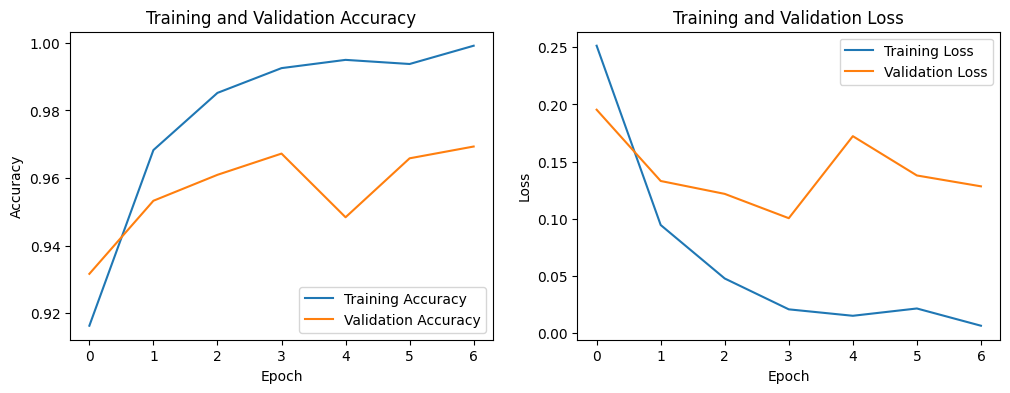

In [67]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fold2.history['accuracy'], label='Training Accuracy')
plt.plot(history_fold2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_fold2.history['loss'], label='Training Loss')
plt.plot(history_fold2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [68]:
model_fold2.save('RN_CV.h5')

In [69]:
model_fold2.load_weights('RN_CV.h5')

In [70]:
pred22 = model_fold2.predict(test_images2)
pred22=np.argmax(pred22,axis=1)

57/57 [==============================] - 6s 86ms/step


In [71]:
print("Classification Report:")
print(classification_report(y_true1, pred22))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       299
           1       0.99      0.99      0.99       298
           2       0.99      1.00      0.99       298
           3       0.97      0.90      0.93       299
           4       0.98      0.98      0.98       300
           5       0.93      0.94      0.94       299

    accuracy                           0.96      1793
   macro avg       0.96      0.96      0.96      1793
weighted avg       0.96      0.96      0.96      1793



In [72]:
pred_df22=test_df.copy()
labels={}
for l,v in test_images2.class_indices.items(): 
    labels.update({v:l}) # updates the labels dictionary by adding an entry where the class index (v) is the key, and the corresponding class label (l) is the value. 
pred_df22['pred']=pred22 # Adds new prediction column
pred_df22['pred']=pred_df22['pred'].apply(lambda x: labels[x]) # Replaces class indices with label

In [73]:
pred_df22=pred_df22.reset_index(drop=True)
pred_df22.head(10)

,path,label,pred
0,/content/DS/Eel/Eel_original_14280696540_d8bbb...,Eel,Eel
1,/content/DS/Jelly Fish/JellyFish (290).jpg,Jelly Fish,Jelly Fish
2,/content/DS/Eel/Eel_original_14280739098_166c1...,Eel,Eel
3,/content/DS/Corals/Corals_original_5476531005_...,Corals,Corals
4,/content/DS/Crabs/15933156699_785b86be8b_o.jpg,Crabs,Crabs
5,/content/DS/Jelly Fish/43745338970_dd96e5720d_...,Jelly Fish,Jelly Fish
6,/content/DS/Eel/11560314403_c623953e68_o.jpg,Eel,Corals
7,/content/DS/Crabs/22043335118_5b3a2b2e9e_b.jpg,Crabs,Crabs
8,/content/DS/Jelly Fish/14331959343_45b748f229_...,Jelly Fish,Jelly Fish
9,/content/DS/Lobster/Lobster_original_477223970...,Lobster,Lobster


Text(0.5, 1.0, 'Confusion Matrix')

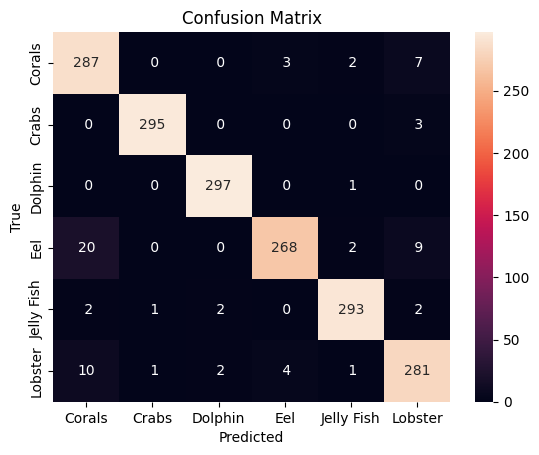

In [74]:
labels= ['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster']
sns.heatmap(confusion_matrix(pred_df22['label'],pred_df22['pred']), xticklabels=labels, yticklabels= labels,annot=True, fmt='2d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [75]:
# Incorrect prediction
pred_df22[pred_df22['label']!=pred_df22['pred']]

,path,label,pred
6,/content/DS/Eel/11560314403_c623953e68_o.jpg,Eel,Corals
37,/content/DS/Eel/Eel_original_5373093062_c70899...,Eel,Corals
84,/content/DS/Crabs/Crabs_original_26916715593_c...,Crabs,Lobster
114,/content/DS/Eel/31881686523_8f498d85f4_o.jpg,Eel,Corals
116,/content/DS/Corals/Corals_original_20643727620...,Corals,Eel
...,...,...,...
1751,/content/DS/Eel/37745212636_b022d41769_o.jpg,Eel,Corals
1760,/content/DS/Lobster/Lobster_original_789878050...,Lobster,Eel
1772,/content/DS/Lobster/5577380526_1ea34e10e2_o.jpg,Lobster,Eel
1774,/content/DS/Eel/Eel_original_7692494802_0089a2...,Eel,Corals
